In [11]:
import requests
import numpy as np
import json
import pandas as pd
from datetime import datetime, timedelta
import sklearn
end_date = datetime(2024, 6, 1)
start_date = end_date - timedelta(days=5000)


# OTHER

In [12]:
API_KEY = "wUvM2M29ZVxHDvK8IRp2P7iyrT8uhQG4"

ticker = "AAPL"

url_hist_stock_price = f"https://financialmodelingprep.com/stable/historical-price-eod/light?symbol={ticker}&from={start_date.date()}&to={end_date.date()}&apikey={API_KEY}"

# Historical Data Request
response_hist_stock_price = requests.get(url_hist_stock_price)

json_response_hist_stock_price = response_hist_stock_price.json()

df_stock_hist = pd.DataFrame(json_response_hist_stock_price)

df_stock_hist['date'] = pd.to_datetime(df_stock_hist['date'])
df_stock_hist['price'] = df_stock_hist['price'].astype(float)
df_stock_hist['volume'] = df_stock_hist['volume'].astype(float)


df_stock_hist.set_index('date', inplace=True)
df_stock_hist.drop(columns=['symbol'])

closing_price = df_stock_hist[['price']]
i_volume = df_stock_hist[['volume']]
volume =i_volume.apply(np.log10)


# IDEM for ALPHA VANTAGE and OTHER

In [ ]:

# Daily Return
daily_return = closing_price.pct_change()
print(daily_return)
# 5-Day Return
ret_5d = closing_price.pct_change(5)
# 10-Day Return
ret_10d = closing_price.pct_change(10)

# 5-Day Volatility (Std Dev of Returns)
vol_5d = closing_price.pct_change().rolling(window=5).std()

# 10-Day Volatility
vol_10d = (closing_price.pct_change().rolling(window=10).std())

# Momentum (10d)
momentum_10d = closing_price - closing_price.shift(10)

# SMA_10/SMA_50 Ratio
sma_10 = closing_price.rolling(window=10).mean()
sma_50 = closing_price.rolling(window=50).mean()
sma_ratio = sma_10/sma_50

# Z-score (20d)
rolling_mean = closing_price.rolling(window=20).mean()
rolling_std = closing_price.rolling(window=20).std()
z_score_20d = (closing_price - rolling_mean)/rolling_std

# RSI (14d)
delta = closing_price.diff()
gain = delta.where(delta > 0, 0.0)
loss = -delta.where(delta < 0, 0.0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain/avg_loss
rsi_14 = 100 - (100 / (1 + rs))
y =  closing_price.shift(-1)
y.columns = ['y']

dataframes = [
    (daily_return, 'ret_1d'),
    (ret_5d, 'ret_5d'),
    (ret_10d, 'ret_10d'),
    (vol_5d, 'vol_5d'),
    (vol_10d, 'vol_10d'),
    (momentum_10d, 'momentum_10d'),
    (sma_ratio, 'sma_ratio_10_50'),
    (z_score_20d, 'zscore_20d'),
    (rsi_14, 'rsi_14'),
    (volume,'volume'),
    (y,'y'),
]

df_features_short_term = pd.concat(
    [df.rename(columns={df.columns[0]: name}) for df, name in dataframes],
    axis=1
).dropna()
y_not_scaled = df_features_short_term[["y"]]


               price
date                
2024-05-31       NaN
2024-05-30 -0.004993
2024-05-29 -0.005228
2024-05-28 -0.001577
2024-05-24 -0.000053
...              ...
2010-09-29  0.012833
2010-09-28 -0.001949
2010-09-27  0.015625
2010-09-24  0.003846
2010-09-23 -0.011494

[3445 rows x 1 columns]
                 y
date              
2024-05-31  191.29
2024-05-30  190.29
2024-05-29  189.99
2024-05-28  189.98
2024-05-24  186.88
...            ...
2010-09-29   10.24
2010-09-28   10.40
2010-09-27   10.44
2010-09-24   10.32
2010-09-23     NaN

[3445 rows x 1 columns]


,ret_1d,ret_5d,ret_10d,vol_5d,vol_10d,momentum_10d,sma_ratio_10_50,zscore_20d,rsi_14,volume,y
ret_1d,1.000000,0.438700,0.320998,0.147929,0.129678,0.252617,0.029738,0.423993,0.234909,-0.000386,0.015691
ret_5d,0.438700,1.000000,0.701031,0.200762,0.257569,0.542438,0.175336,0.757909,0.542559,0.000738,0.036390
ret_10d,0.320998,0.701031,1.000000,0.184990,0.280936,0.770876,0.435613,0.840804,0.775064,0.023297,0.053226
vol_5d,0.147929,0.200762,0.184990,1.000000,0.829059,0.115451,0.068042,0.193557,0.154810,0.145319,0.076451
vol_10d,0.129678,0.257569,0.280936,0.829059,1.000000,0.176671,0.133892,0.273930,0.225933,0.158525,0.081649
momentum_10d,0.252617,0.542438,0.770876,0.115451,0.176671,1.000000,0.314991,0.647423,0.580264,0.056831,-0.005486
sma_ratio_10_50,0.029738,0.175336,0.435613,0.068042,0.133892,0.314991,1.000000,0.450906,0.580902,0.043713,0.094523
zscore_20d,0.423993,0.757909,0.840804,0.193557,0.273930,0.647423,0.450906,1.000000,0.843751,0.042349,0.064753
rsi_14,0.234909,0.542559,0.775064,0.154810,0.225933,0.580264,0.580902,0.843751,1.000000,0.030352,0.092889
volume,-0.000386,0.000738,0.023297,0.145319,0.158525,0.056831,0.043713,0.042349,0.030352,1.000000,-0.692924


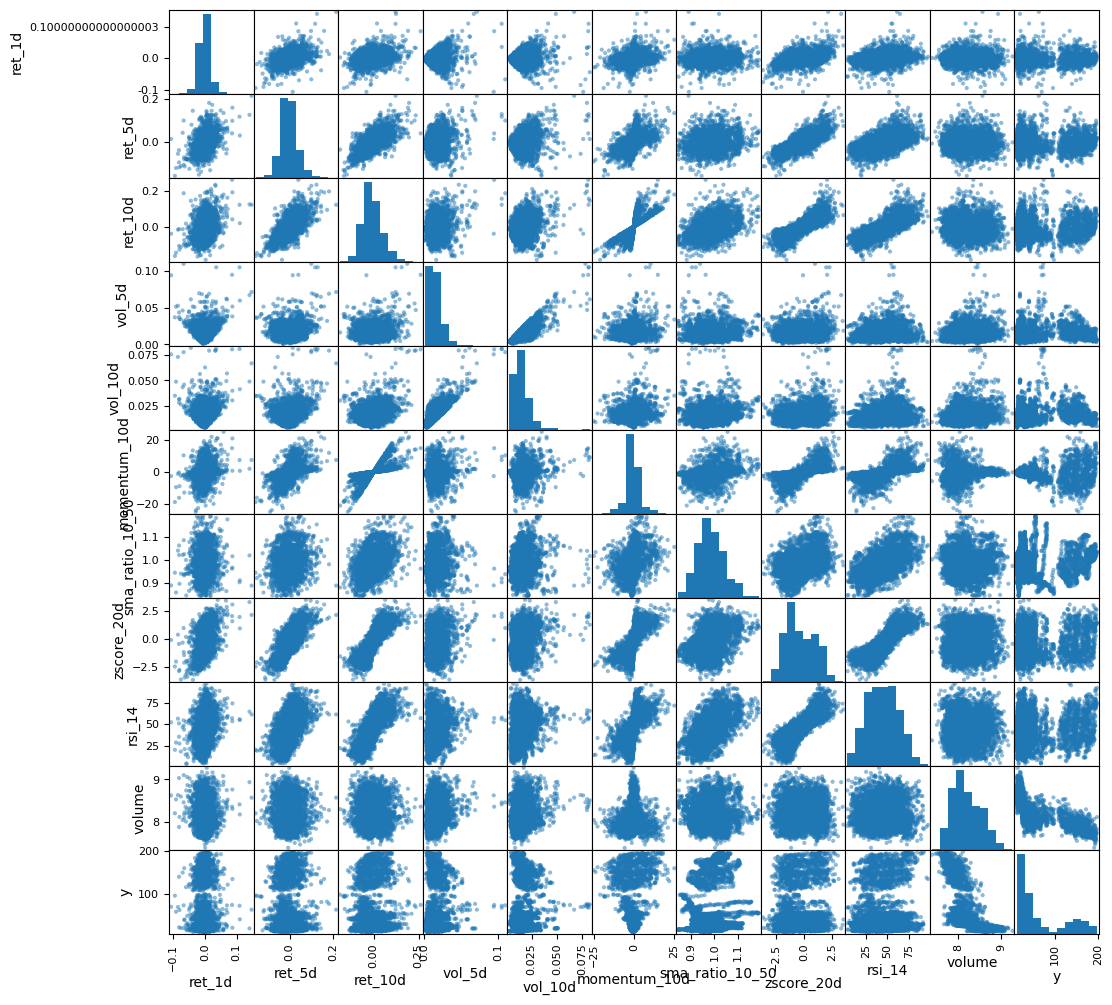

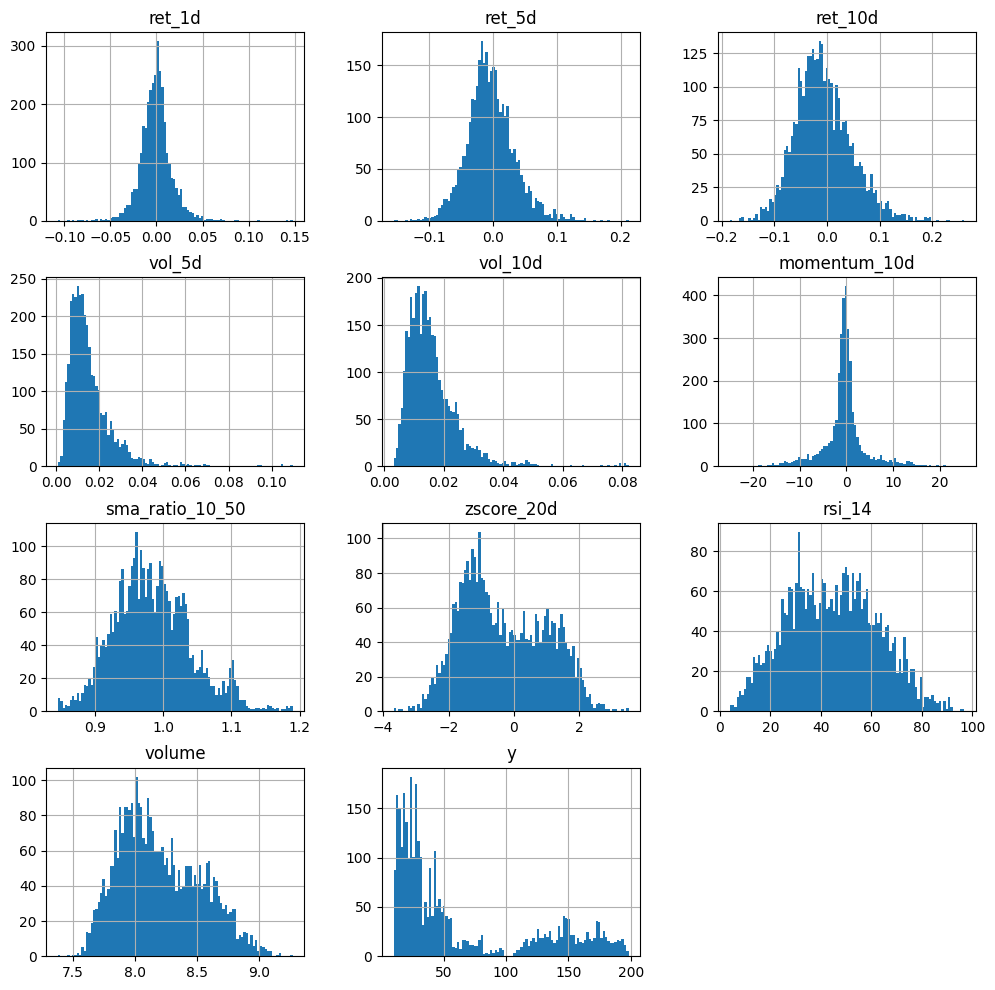

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_features_short_term, figsize=(12, 12), diagonal='hist')  # or 'kde'
df_features_short_term.hist(figsize=(12, 12), bins=100)
df_features_short_term.corr()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_features_short_term)
X_scaled = scaler.transform(df_features_short_term)
df_scaled = pd.DataFrame(X_scaled, index=df_features_short_term.index, columns=df_features_short_term.columns)
print(df_scaled)


              ret_1d    ret_5d   ret_10d    vol_5d   vol_10d  momentum_10d  \
date                                                                         
2024-03-21 -0.260096  0.073269  0.325553 -0.205210 -0.715327      0.489768   
2024-03-20  2.439284  0.905799  1.220352  0.860508  0.042704      2.235005   
2024-03-19 -0.779557  1.080048  0.837562  0.682961  0.191932      1.494470   
2024-03-18 -0.717936  0.533192  0.669081  0.888066  0.273551      1.158848   
2024-03-15 -0.319288  0.142232  0.413124  0.905219  0.293016      0.662993   
...              ...       ...       ...       ...       ...           ...   
2010-09-30  0.261200 -0.420404 -1.033618  0.394848 -0.301420     -0.042897   
2010-09-29  0.761208 -0.088520 -0.675505  0.545559 -0.145578      0.002574   
2010-09-28 -0.072200 -0.114248 -0.609771  0.545771 -0.144491      0.011235   
2010-09-27  0.918606  1.282889 -0.138288 -0.780292 -0.023102      0.069699   
2010-09-24  0.254538  1.004972  0.020929 -0.818754 -0.019824    

,ret_1d,ret_5d,ret_10d,vol_5d,vol_10d,momentum_10d,sma_ratio_10_50,zscore_20d,rsi_14,volume,y
ret_1d,1.000000,0.438700,0.320998,0.147929,0.129678,0.252617,0.029738,0.423993,0.234909,-0.000386,0.015691
ret_5d,0.438700,1.000000,0.701031,0.200762,0.257569,0.542438,0.175336,0.757909,0.542559,0.000738,0.036390
ret_10d,0.320998,0.701031,1.000000,0.184990,0.280936,0.770876,0.435613,0.840804,0.775064,0.023297,0.053226
vol_5d,0.147929,0.200762,0.184990,1.000000,0.829059,0.115451,0.068042,0.193557,0.154810,0.145319,0.076451
vol_10d,0.129678,0.257569,0.280936,0.829059,1.000000,0.176671,0.133892,0.273930,0.225933,0.158525,0.081649
momentum_10d,0.252617,0.542438,0.770876,0.115451,0.176671,1.000000,0.314991,0.647423,0.580264,0.056831,-0.005486
sma_ratio_10_50,0.029738,0.175336,0.435613,0.068042,0.133892,0.314991,1.000000,0.450906,0.580902,0.043713,0.094523
zscore_20d,0.423993,0.757909,0.840804,0.193557,0.273930,0.647423,0.450906,1.000000,0.843751,0.042349,0.064753
rsi_14,0.234909,0.542559,0.775064,0.154810,0.225933,0.580264,0.580902,0.843751,1.000000,0.030352,0.092889
volume,-0.000386,0.000738,0.023297,0.145319,0.158525,0.056831,0.043713,0.042349,0.030352,1.000000,-0.692924


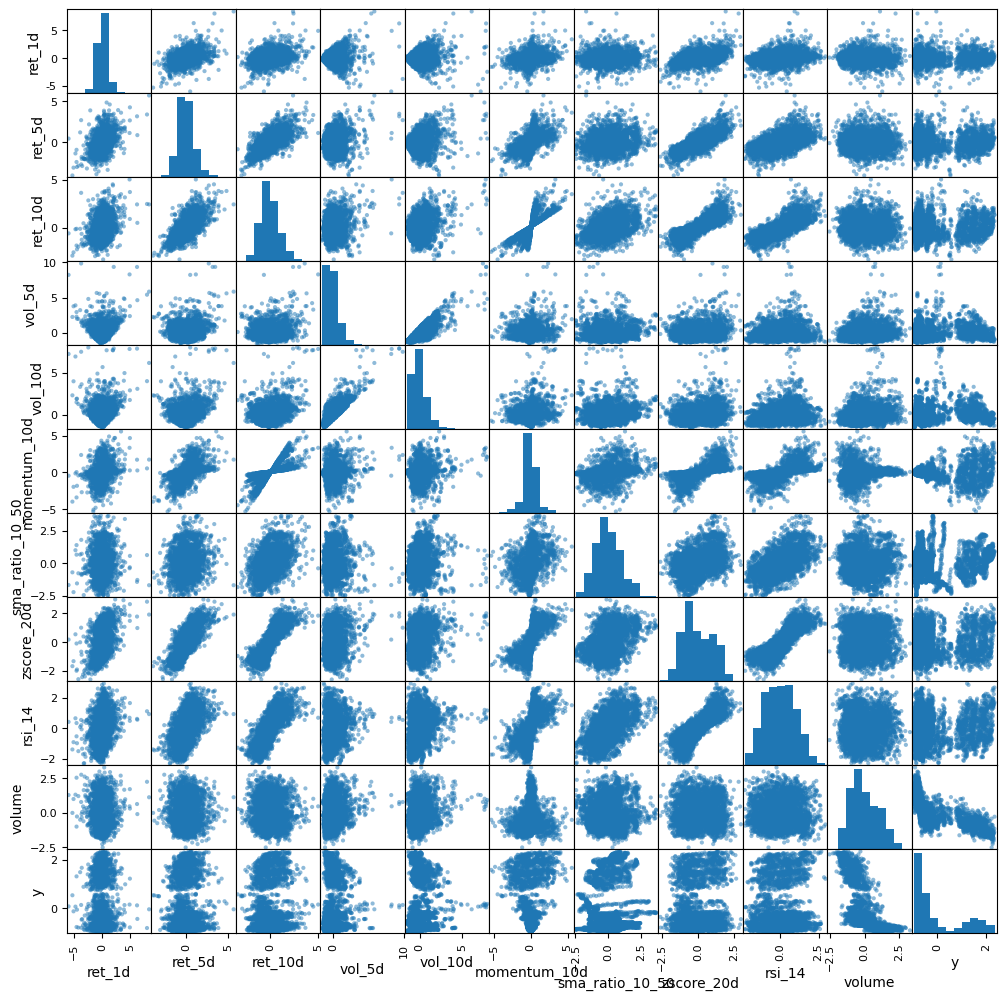

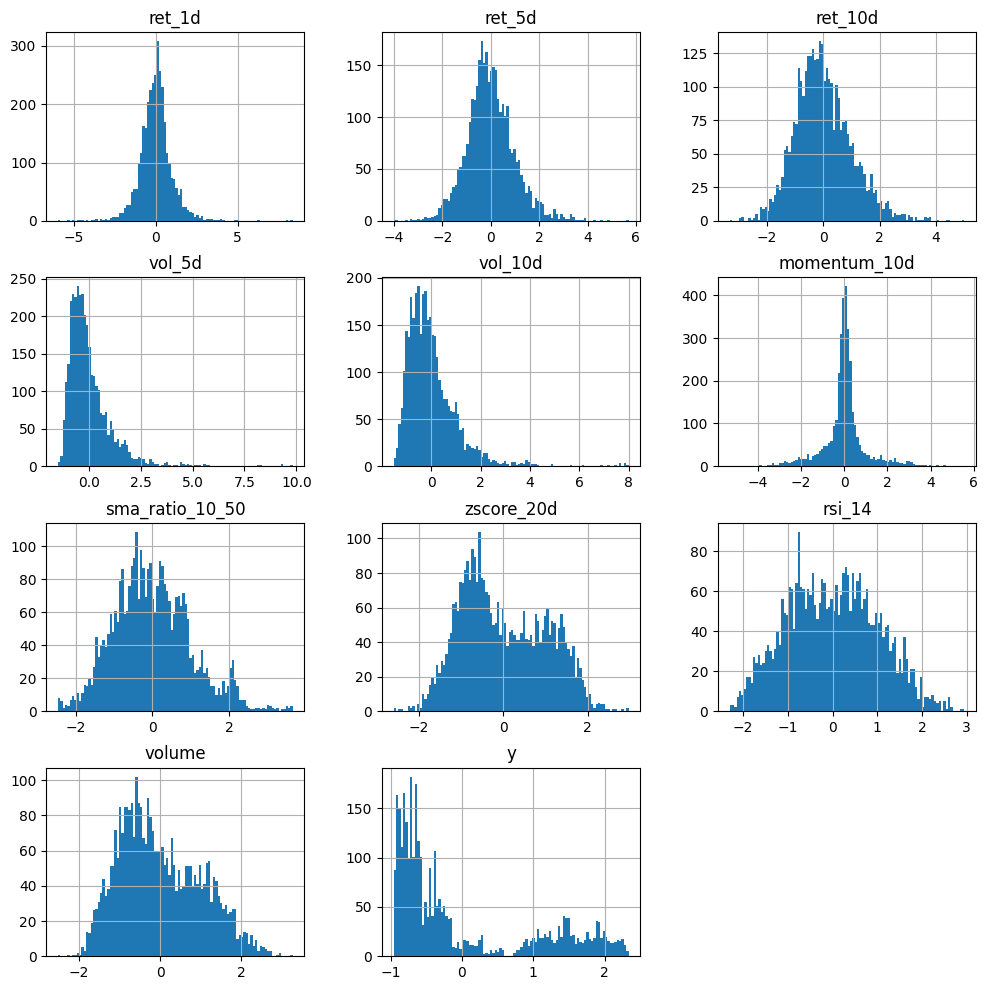

In [ ]:
from pandas.plotting import scatter_matrix

#scatter_matrix(df_scaled, figsize=(12, 12), diagonal='hist')  # or 'kde'
#df_scaled.hist(figsize=(12, 12), bins=100)

#df_scaled.corr()

,ret_1d,ret_5d,ret_10d,vol_5d,vol_10d,momentum_10d,sma_ratio_10_50,zscore_20d,rsi_14,volume,y
ret_1d,1.000000,0.391557,0.255030,0.082369,0.075384,0.212174,0.016614,0.391556,0.202925,-0.026631,0.029879
ret_5d,0.391557,1.000000,0.662572,0.082830,0.163165,0.498562,0.153998,0.743217,0.509660,-0.003455,0.040303
ret_10d,0.255030,0.662572,1.000000,0.053082,0.163334,0.724428,0.416342,0.839992,0.776648,0.028499,0.042393
vol_5d,0.082369,0.082830,0.053082,1.000000,0.728543,0.031864,0.075868,0.117424,0.122814,0.104976,0.102784
vol_10d,0.075384,0.163165,0.163334,0.728543,1.000000,0.111112,0.134450,0.224165,0.203571,0.136015,0.104614
momentum_10d,0.212174,0.498562,0.724428,0.031864,0.111112,1.000000,0.321137,0.644465,0.569987,0.113581,-0.081655
sma_ratio_10_50,0.016614,0.153998,0.416342,0.075868,0.134450,0.321137,1.000000,0.443744,0.575672,0.071413,0.073006
zscore_20d,0.391556,0.743217,0.839992,0.117424,0.224165,0.644465,0.443744,1.000000,0.833059,0.056261,0.046408
rsi_14,0.202925,0.509660,0.776648,0.122814,0.203571,0.569987,0.575672,0.833059,1.000000,0.050658,0.075761
volume,-0.026631,-0.003455,0.028499,0.104976,0.136015,0.113581,0.071413,0.056261,0.050658,1.000000,-0.688154


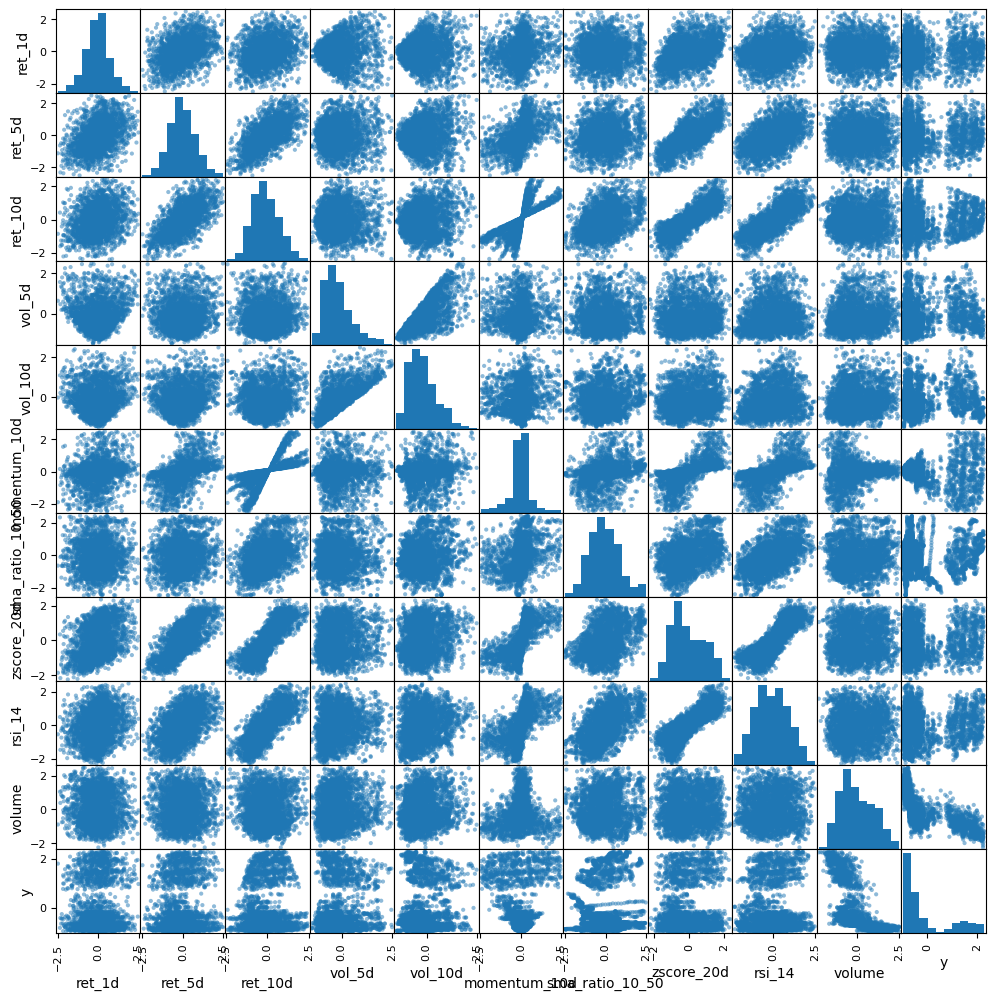

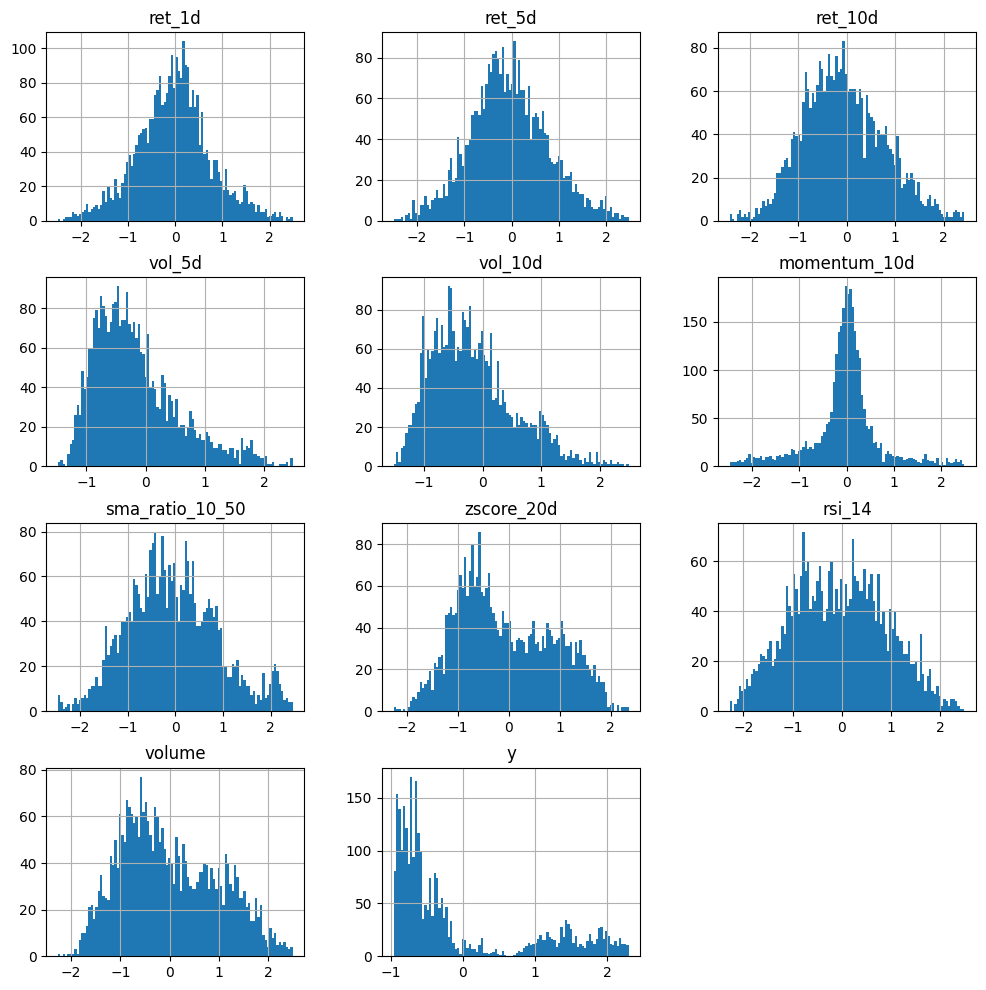

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores for the dataset
z_scores = np.abs(zscore(df_scaled))

# Set a threshold for identifying outliers (commonly 3)
threshold = 2.5 # confidence interval of data around 97.6 %.

# Identify rows where any column has a Z-score greater than threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
df_no_outliers = df_scaled[~outliers]


# DATA ANALYSIS

from pandas.plotting import scatter_matrix

scatter_matrix(df_no_outliers, figsize=(12, 12), diagonal='hist')  # or 'kde'
#df_no_outliers.hist(figsize=(12, 12), bins=100)

#df_no_outliers.corr()


In [18]:
# Train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Features df
X = df_no_outliers.drop(columns=['y'])
# Target Columns
y = df_no_outliers['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



# Train a Linear Regression model (least squared)
model = LinearRegression()
model.fit(X_train, y_train) # Find A in y=Ax

# Predict and evaluate
y_pred = model.predict(X_test) # Predict y_test using the A matrix found and X_test
rmse = root_mean_squared_error(y_test,y_pred) # Compare the found y_test (y_prep) to the true y_test
print(rmse)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

0.675791177454047
              Actual  Predicted
date                           
2017-08-08 -0.436664   0.197346
2014-07-18 -0.723968  -0.302464
2022-08-30  1.691093   0.897075
2014-08-06 -0.715050  -0.405760
2016-10-11 -0.623595  -0.660320
...              ...        ...
2013-08-06 -0.837630  -0.599517
2018-05-10 -0.311811   0.058426
2023-03-06  1.510108   0.427944
2015-05-06 -0.580928  -0.773190
2011-11-09 -0.877149  -1.070836

[599 rows x 2 columns]


In [20]:
import xgboost as xgb
import shap


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Set up parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression problem
    'max_depth': 6,                   # Depth of the tree
    'eta': 0.1,                       # Learning rate
    'subsample': 0.8,                 # Fraction of samples used for training
    'colsample_bytree': 0.8,          # Fraction of features used for training
    'eval_metric': 'rmse'             # Evaluation metric (Root Mean Squared Error)
}

# Train the model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)

y_pred = model.predict(dtest)

# Convert predictions to a DataFrame to see the results
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rmse = root_mean_squared_error(y_test,y_pred) # Compare the found y_test (y_prep) to the true y_test
print(rmse)

y_baseline= np.zeros_like(y_test)
baseline_error = root_mean_squared_error(y_test,y_baseline) # Compare the found y_test (y_prep) to the true y_test
print(baseline_error)
print(predictions)


0.2014878348912151
1.0240635902057285
              Actual  Predicted
date                           
2017-08-08 -0.436664  -0.492096
2014-07-18 -0.723968  -0.726474
2022-08-30  1.691093   1.531493
2014-08-06 -0.715050  -0.687061
2016-10-11 -0.623595  -0.696741
...              ...        ...
2013-08-06 -0.837630  -0.875813
2018-05-10 -0.311811  -0.356542
2023-03-06  1.510108   1.202891
2015-05-06 -0.580928  -0.688341
2011-11-09 -0.877149  -0.872668

[599 rows x 2 columns]
